In [3]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

P(even, D)

Fraction(1, 2)

In [4]:
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

P(even, D)

Fraction(1, 2)

In [5]:
def cross(A, B):
    "The set of ways of concatenating one item from collection A with one from B."
    return {a + b 
            for a in A for b in B}

urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [6]:
len(urn)

23

In [7]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a concatenated str."
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}

U6 = combos(urn, 6)

len(U6)

100947

In [8]:
import random

random.sample(U6, 10)

['R6 W8 R7 B2 R5 B1',
 'R6 R2 W2 W3 B1 W5',
 'W1 R4 W6 R8 B2 W3',
 'W8 B5 R7 B2 W7 B4',
 'W4 R7 B2 R9 R3 R1',
 'W4 W6 B2 B6 R3 R1',
 'R4 W6 R5 W2 W7 B6',
 'R7 B2 R9 B3 W2 B6',
 'W6 B5 R9 W2 W3 B1',
 'W1 R8 R7 B2 B3 B6']

In [9]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [10]:
choose(23, 6)

100947

In [11]:
red6 = {s for s in U6 if s.count('R') == 6}

P(red6, U6)

Fraction(4, 4807)

In [12]:
len(red6)

84

In [13]:
choose(9, 6)

84

In [14]:
P(red6, U6) == Fraction(choose(9, 6), 
                        len(U6))

True

In [15]:
b3w2r1 = {s for s in U6 if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(b3w2r1, U6)

Fraction(240, 4807)

In [16]:
P(b3w2r1, U6) == Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), 
                          len(U6))

True

In [17]:
 P(b3w2r1, U6) == Fraction((6 * 5 * 4) * (8 * 7) * 9, 
                           factorial(3) * factorial(2) * len(U6))

True

In [18]:
w4 = {s for s in U6 if
      s.count('W') == 4}

P(w4, U6)

Fraction(350, 4807)

In [19]:
P(w4, U6) == Fraction(choose(8, 4) * choose(15, 2),
                      len(U6))

True

In [20]:
P(w4, U6) == Fraction((8 * 7 * 6 * 5) * (15 * 14),
                      factorial(4) * factorial(2) * len(U6))

True

In [21]:
def even(n): return n % 2 == 0

In [22]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

In [23]:
such_that(even, D)

{2, 4, 6}

In [24]:
P(even, D)

Fraction(1, 2)

In [25]:
D12 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, D12)

{2, 4, 6, 8, 10, 12}

In [26]:
P(even, D12)

Fraction(1, 2)

In [27]:
D3 = {(d1, d2, d3) for d1 in D for d2 in D for d3 in D}

def prime_sum(outcome): return is_prime(sum(outcome))

def is_prime(n): return n > 1 and not any(n % i == 0 for i in range(2, n))

P(prime_sum, D3)

Fraction(73, 216)

In [28]:
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = cross(ranks, suits)
len(deck)

52

In [29]:
Hands = combos(deck, 5)

assert len(Hands) == choose(52, 5)

random.sample(Hands, 5)

['6S KC 2S 7H QH',
 '3H 9C TS 5S TD',
 'JD 7D 4H 9S 6H',
 '3S 2D 9S AC 4C',
 '2S 8S KD 6H QH']

In [30]:
def flush(hand):
    return any(hand.count(suit) == 5 for suit in suits)

P(flush, Hands)

Fraction(33, 16660)

In [31]:
def four_kind(hand):
    return any(hand.count(rank) == 4 for rank in ranks)

P(four_kind, Hands)

Fraction(1, 4165)

In [33]:
def win_unfinished_game(Hneeds, Tneeds):
    "The probability that H will win the unfinished game, given the number of points needed by H and T to win."
    def Hwins(outcome): return outcome.count('h') >= Hneeds
    return P(Hwins, continuations(Hneeds, Tneeds))

def continuations(Hneeds, Tneeds):
    "All continuations of a game where H needs `Hneeds` points to win and T needs `Tneeds`."
    rounds = ['ht' for _ in range(Hneeds + Tneeds - 1)]
    return set(itertools.product(*rounds))

In [34]:
continuations(2, 3)

{('h', 'h', 'h', 'h'),
 ('h', 'h', 'h', 't'),
 ('h', 'h', 't', 'h'),
 ('h', 'h', 't', 't'),
 ('h', 't', 'h', 'h'),
 ('h', 't', 'h', 't'),
 ('h', 't', 't', 'h'),
 ('h', 't', 't', 't'),
 ('t', 'h', 'h', 'h'),
 ('t', 'h', 'h', 't'),
 ('t', 'h', 't', 'h'),
 ('t', 'h', 't', 't'),
 ('t', 't', 'h', 'h'),
 ('t', 't', 'h', 't'),
 ('t', 't', 't', 'h'),
 ('t', 't', 't', 't')}

In [35]:
win_unfinished_game(2, 3)

Fraction(11, 16)

In [41]:
class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

In [42]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...};
    if space is a ProbDist, return a ProbDist {outcome: frequency,...};
    in both cases only with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

In [43]:
DK = ProbDist(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

{'BB': 0.2645086533229465,
 'BG': 0.24882071317004043,
 'GB': 0.24826679089140383,
 'GG': 0.23840384261560926}

In [44]:
def first_girl(outcome):  return outcome[0] == 'G'
def first_boy(outcome):   return outcome[0] == 'B'
def second_girl(outcome): return outcome[1] == 'G'
def second_boy(outcome):  return outcome[1] == 'B'
def two_girls(outcome):   return outcome    == 'GG'

In [45]:
P(first_girl, DK)

0.4866706335070131

In [46]:
P(second_girl, DK)

0.4872245557856497

In [47]:
P(second_girl, such_that(first_girl, DK)), P(second_girl, such_that(first_boy, DK))

(0.4898669165584115, 0.48471942072973107)

In [48]:
P(second_boy, such_that(first_girl, DK)), P(second_boy, such_that(first_boy, DK))

(0.5101330834415885, 0.5152805792702689)

In [49]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

In [65]:
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

MM = joint(bag94, bag96, ' ')MM

{'brown blue': 0.07199999999999997,
 'brown brown': 0.038999999999999986,
 'brown green': 0.05999999999999997,
 'brown orange': 0.04799999999999998,
 'brown red': 0.038999999999999986,
 'brown yellow': 0.04199999999999998,
 'green blue': 0.02399999999999999,
 'green brown': 0.012999999999999996,
 'green green': 0.019999999999999993,
 'green orange': 0.015999999999999993,
 'green red': 0.012999999999999996,
 'green yellow': 0.013999999999999995,
 'orange blue': 0.02399999999999999,
 'orange brown': 0.012999999999999996,
 'orange green': 0.019999999999999993,
 'orange orange': 0.015999999999999993,
 'orange red': 0.012999999999999996,
 'orange yellow': 0.013999999999999995,
 'red blue': 0.04799999999999998,
 'red brown': 0.025999999999999992,
 'red green': 0.03999999999999999,
 'red orange': 0.03199999999999999,
 'red red': 0.025999999999999992,
 'red yellow': 0.02799999999999999,
 'tan blue': 0.02399999999999999,
 'tan brown': 0.012999999999999996,
 'tan green': 0.019999999999999993,
 '

In [68]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

{'green yellow': 0.25925925925925924, 'yellow green': 0.7407407407407408}

In [69]:
def yellow94(outcome): return outcome.startswith('yellow')

P(yellow94, such_that(yellow_and_green, MM))

0.7407407407407408

In [70]:
die = ProbDist({'6':1/6, '-':5/6})

def dice(n, die):
    "Joint probability from tossing n dice."
    if n == 1:
        return die
    else:
        return joint(die, dice(n - 1, die))

In [71]:
dice(3, die)

{'---': 0.5787037037037037,
 '--6': 0.11574074074074073,
 '-6-': 0.11574074074074073,
 '-66': 0.023148148148148143,
 '6--': 0.11574074074074073,
 '6-6': 0.023148148148148143,
 '66-': 0.023148148148148143,
 '666': 0.0046296296296296285}

In [72]:
def at_least(k, result): return lambda s: s.count(result) >= k

In [73]:
P(at_least(1, '6'), dice(6, die))

0.6651020233196159

In [74]:
P(at_least(2, '6'), dice(12, die))

0.6186673737323101

In [75]:
P(at_least(3, '6'), dice(18, die))

0.5973456859477544

In [76]:
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here         

def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)         

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card

In [77]:
results = list(monopoly(400000))

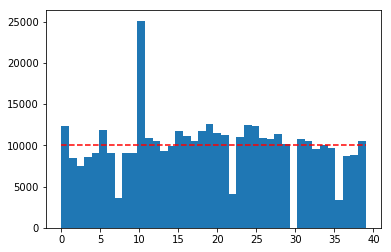

In [78]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

In [79]:
ProbDist(Counter(board[i] for i in results))

{'A1': 0.021155,
 'A2': 0.021345,
 'B1': 0.022635,
 'B2': 0.0227075,
 'B3': 0.0227925,
 'C1': 0.0272525,
 'C2': 0.0233925,
 'C3': 0.0248475,
 'CC1': 0.01883,
 'CC2': 0.0264125,
 'CC3': 0.023845,
 'CH1': 0.0091375,
 'CH2': 0.010365,
 'CH3': 0.0083375,
 'D1': 0.0277175,
 'D2': 0.02938,
 'D3': 0.0313975,
 'E1': 0.02819,
 'E2': 0.027475,
 'E3': 0.03125,
 'F1': 0.027295,
 'F2': 0.0268825,
 'F3': 0.0255325,
 'FP': 0.0287675,
 'G1': 0.0267825,
 'G2': 0.0262125,
 'G3': 0.0249775,
 'GO': 0.03082,
 'H1': 0.0218075,
 'H2': 0.0263525,
 'JAIL': 0.062765,
 'R1': 0.029725,
 'R2': 0.02919,
 'R3': 0.0307825,
 'R4': 0.0241375,
 'T1': 0.022815,
 'T2': 0.0219775,
 'U1': 0.0263025,
 'U2': 0.02841}

In [80]:
from random import gauss, triangular, choice, vonmisesvariate, uniform

def SC(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
def KT(): return posint(gauss(10.2, 3) + 3 * triangular(1, 3.5, 9)) # 22.1
def DG(): return posint(vonmisesvariate(30, 2) * 3.08) # 14.0
def HB(): return posint(gauss(6.7, 1.5) if choice((True, False)) else gauss(16.7, 2.5)) # 11.7
def OT(): return posint(triangular(5, 17, 25) + uniform(0, 30) + gauss(6, 3)) # 37.0

def posint(x): "Positive integer"; return max(0, int(round(x)))

In [81]:
from statistics import mean

def repeated_hist(rv, bins=10, k=100000):
    "Repeat rv() k times and make a histogram of the results."
    samples = [rv() for _ in range(k)]
    plt.hist(samples, bins=bins)
    return mean(samples)

30.06325

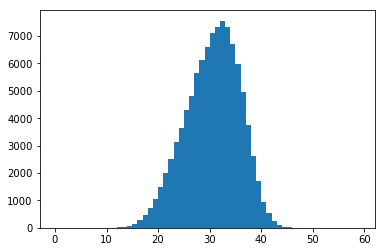

In [82]:
repeated_hist(SC, bins=range(60))

22.18656

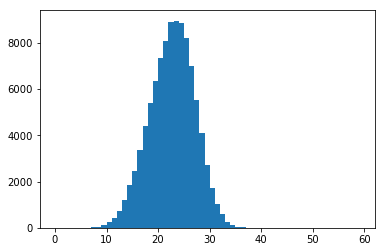

In [83]:
repeated_hist(KT, bins=range(60))

14.00888

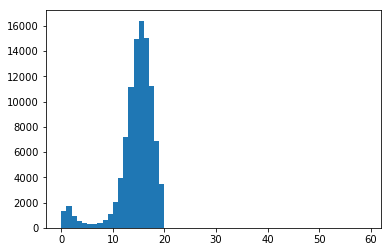

In [84]:
repeated_hist(DG, bins=range(60))

11.72713

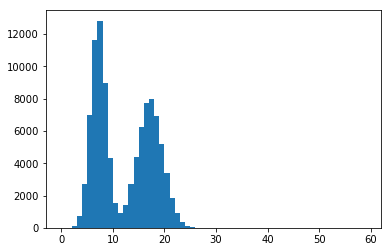

In [85]:
repeated_hist(HB, bins=range(60))

36.29554

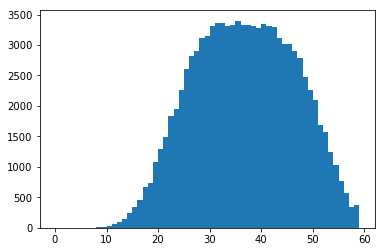

In [86]:
repeated_hist(OT, bins=range(60))

114.21342

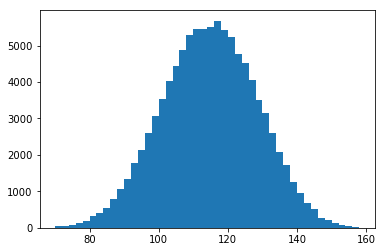

In [87]:
def GSW(): return SC() + KT() + DG() + HB() + OT()

repeated_hist(GSW, bins=range(70, 160, 2))

In [88]:
def number(cutoff):
    "Play the game with given cutoff, returning the first or second random number."
    first = random.random()
    return first if first > cutoff else random.random()

In [89]:
number(.5)

0.16973826904081246

In [90]:
def Pwin(A, B, trials=30000):
    "The probability that cutoff A wins against cutoff B."
    Awins = sum(number(A) > number(B) 
                for _ in range(trials))
    return Awins / trials

In [91]:
Pwin(.5, .6)

0.49206666666666665

In [92]:
def top(N, cutoffs):
    "Return the N best cutoffs and the number of opponent cutoffs they beat."
    winners = Counter(A if Pwin(A, B) > 0.5 else B
                      for (A, B) in itertools.combinations(cutoffs, 2))
    return winners.most_common(N)

In [93]:
from numpy import arange

%time top(5, arange(0.50, 0.99, 0.01))

Wall time: 31 s


[(0.6100000000000001, 45),
 (0.62000000000000011, 45),
 (0.63000000000000012, 44),
 (0.59000000000000008, 43),
 (0.55000000000000004, 42)]

In [94]:
def Phigher(A, B):
    "Probability that a sample from [A..1] is higher than one from [B..1]."
    if A <= B:
        return (1 - B) / (2 * (1 - A))
    else:
        return 1 - Phigher(B, A)

In [95]:
Phigher(0.5, 0.6)

0.4

In [96]:
def Pwin(A, B):
    "With what probability does cutoff A win against cutoff B?"
    return ((1-A) * (1-B) * Phigher(A, B)  # both above cutoff
            + A * B       * Phigher(0, 0)  # both below cutoff
            + (1-A) * B   * Phigher(A, 0)  # A above, B below
            + A * (1-B)   * Phigher(0, B)) # A below, B above

In [97]:
def test():
    assert Phigher(0.5, 0.5) == Phigher(0.7, 0.7) == Phigher(0, 0) == 0.5
    assert Pwin(0.5, 0.5) == Pwin(0.7, 0.7) == 0.5
    assert Phigher(.6, .5) == 0.6
    assert Phigher(.5, .6) == 0.4
    return 'ok'

test()

'ok'

In [98]:
top(5, arange(0.50, 0.99, 0.01))

[(0.62000000000000011, 48),
 (0.6100000000000001, 47),
 (0.60000000000000009, 46),
 (0.59000000000000008, 45),
 (0.63000000000000012, 44)]

In [99]:
top(10, arange(0.500, 0.700, 0.001))

[(0.6180000000000001, 199),
 (0.6170000000000001, 198),
 (0.6160000000000001, 197),
 (0.61900000000000011, 196),
 (0.6150000000000001, 195),
 (0.6140000000000001, 194),
 (0.6130000000000001, 193),
 (0.62000000000000011, 192),
 (0.6120000000000001, 191),
 (0.6110000000000001, 190)]

In [100]:
top(5, arange(0.61700, 0.61900, 0.00001))

[(0.61802999999999531, 200),
 (0.61801999999999535, 199),
 (0.61803999999999526, 198),
 (0.6180099999999954, 197),
 (0.61799999999999544, 196)]

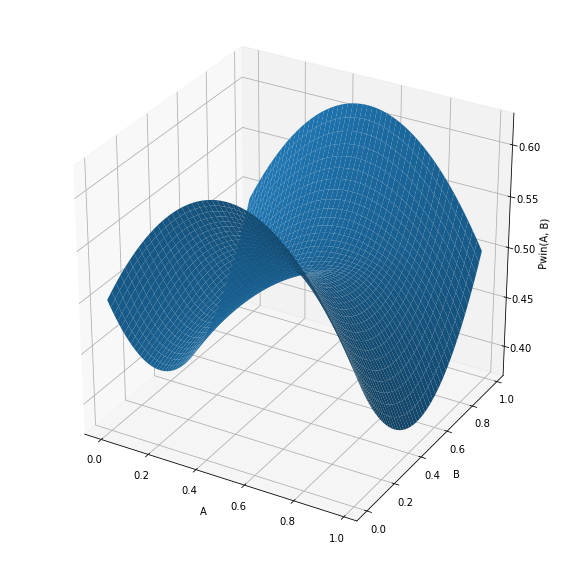

In [101]:
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

def map2(fn, A, B):
    "Map fn to corresponding elements of 2D arrays A and B."
    return [list(map(fn, Arow, Brow))
            for (Arow, Brow) in zip(A, B)]

cutoffs = arange(0.00, 1.00, 0.02)
A, B = np.meshgrid(cutoffs, cutoffs)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Pwin(A, B)')
ax.plot_surface(A, B, map2(Pwin, A, B));

In [102]:
cutoffs = (set(arange(0.00,    1.00,    0.01)) | 
           set(arange(0.500,   0.700,   0.001)) | 
           set(arange(0.61700, 0.61900, 0.00001)))

In [103]:
max([Pwin(A, B), A, B]
    for A in cutoffs for B in cutoffs)

[0.625, 0.5, 0.0]

In [104]:
max(min([Pwin(A, B), A, B] for B in cutoffs)
    for A in cutoffs)

[0.5, 0.61802999999999531, 0.61802999999999531]

In [105]:
min(max([Pwin(A, B), A, B] for A in cutoffs)
    for B in cutoffs)

[0.5, 0.61802999999999531, 0.61802999999999531]